0     Blockchain is a new approach to create a distr...
1     The literature illustrates Blockchain Technolo...
2     Blockchain technology is a disruptive technolo...
3     Effective hospital waste management (HWM) has ...
4     The IoT ecosystem allows communication between...
                            ...                        
88    Digital transformation is a collection of acti...
89    Since the advent of blockchain technology (BT)...
90    In globalised manufacturing and production env...
91    In the last decade various crypto-currencies o...
92    Blockchain is disrupting the banking industry ...
Name: abstracts, Length: 93, dtype: object
  (0, 707)	0.08588347170041483
  (0, 2100)	0.054809289488633874
  (0, 1063)	0.058576045966122266
  (0, 715)	0.07432183065709733
  (0, 1003)	0.05599018015982261
  (0, 1809)	0.08588347170041483
  (0, 2701)	0.10020386627217487
  (0, 87)	0.06912968406039394
  (0, 1714)	0.10020386627217487
  (0, 934)	0.08588347170041483
  (0, 1935)	0.0669529397

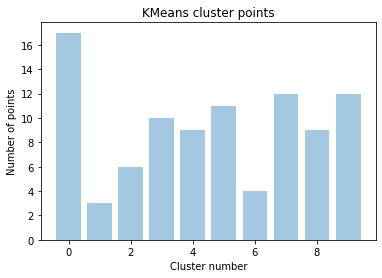

4 review of assigned to cluster  0
----------------------------------------------------------------------
The dramatic growth in smartphone malware shows that malicious program developers are shifting from traditional PC systems to smartphone devices. Therefore, security researchers are also moving towards proposing novel antimalware methods to provide adequate protection. This paper proposes a Blockchain-Based Malware Detection Framework (B2MDF) for detecting malicious mobile applications in mobile applications marketplaces (app stores). The framework consists of two internal and external private blockchains forming a dual private blockchain as well as a consortium blockchain for the final decision. The internal private blockchain stores feature blocks extracted by both static and dynamic feature extractors, while the external blockchain stores detection results as blocks for current versions of applications. B2MDF also shares feature blocks with third parties, and this helps antimalw

In [39]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
import string
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pylab as plt


Total = pd.read_excel('D:/Backup-05-22-2022/Desktop/excel/Total.xlsx')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(Total['abstracts'])


print(Total['abstracts'])
print(X)
print(X.toarray())
print(vectorizer.get_feature_names())
print(X.shape)


# import scipy.cluster.hierarchy as shc
# dend = shc.dendrogram(shc.linkage(vectorizer.get_feature_names(), method='ward'))


from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(X)

labels = model.labels_
cluster_center=model.cluster_centers_
print('************************************************************************')
print(cluster_center)

from sklearn import metrics
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
print('************************************************************************')
print(silhouette_score)


Total['tf_idf Cluster Label'] = model.labels_
print('************************************************************************')
print(Total)
print('************************************************************************')
print(Total.groupby(['tf_idf Cluster Label'])['abstracts'].count())


print('************************************************************************')
print("Top terms per cluster:")
print()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(10):
    print()
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()
        

plt.bar([x for x in range(10)], Total.groupby(['tf_idf Cluster Label'])['abstracts'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()


# Reading a review which belong to each group.
for i in range(10):
    print("4 review of assigned to cluster ", i)
    print("-" * 70)
    print(Total.iloc[Total.groupby(['tf_idf Cluster Label']).groups[i][2]]['abstracts'])
    print('\n')
    print(Total.iloc[Total.groupby(['tf_idf Cluster Label']).groups[i][2]]['abstracts'])
    print('\n')
    print(Total.iloc[Total.groupby(['tf_idf Cluster Label']).groups[i][2]]['abstracts'])
    print('\n')
    print("_" * 70)